## Monthly total number of air passengers for an airline, from January 1949 to December 1960

scource:https://www.kaggle.com/datasets/rakannimer/air-passengers

## Exercise 1: Visualisation of the time series process

In [5]:
# import the necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
# reading the data and checking for information 
df = pd.read_csv('air-passengers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
# converting the columns to lower case letters for convenience 
df.rename(columns={'Passengers':'passengers','Month':'month'}, inplace=True)
df['month'] = pd.to_datetime(df['month'], yearfirst=True)

df.info()
# sets the index to the month and drops the original 
df.set_index('month',drop=True, inplace=True)
#printing the first five samples

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       144 non-null    datetime64[ns]
 1   passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
df

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


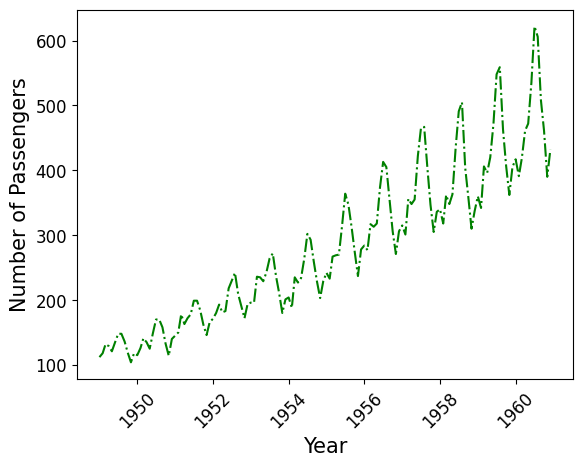

In [9]:
# visualisation of the data 
plt.plot(df['passengers'],'g-.')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

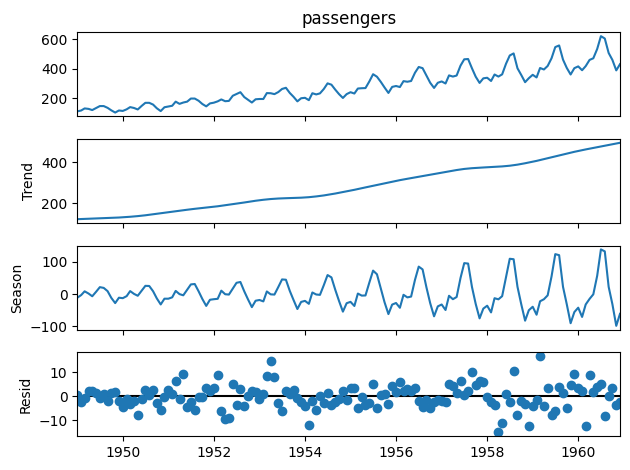

In [10]:
# Decomposition of the series 
from statsmodels.tsa.seasonal import STL  

STL(df['passengers']).fit().plot()
plt.show()

# Exercise 2: Investigation of the time series process

In [11]:
# Stationarity test using Augmented Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
ADF_test = adfuller(df['passengers'])[:2]

print(f"ADF Statistic: {ADF_test[0]}; p-value {ADF_test[1]}")

ADF Statistic: 0.8153688792060482; p-value 0.991880243437641


The p-value is not less than 0.05. Hence, we cannot reject the null hypothesis of non-stationarity.

In [12]:
# Applying differencing to for stationarity
diff_1 = df[['passengers']].diff(1).dropna()
diff_1 

,passengers
month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [13]:
# Testing the differenced series for stationarity
ADF_test = adfuller(diff_1)[:2]

print(f"ADF Statistic: {ADF_test[0]}; p-value {ADF_test[1]}")

ADF Statistic: -2.8292668241699994; p-value 0.0542132902838255


The p-value is not less than 0.05. Hence, we cannot reject the null hypothesis of non-stationarity.

In [14]:
# Performing second differencing for stationarity
diff_2 = diff_1[['passengers']].diff(1).dropna()
diff_2 

,passengers
month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [15]:
# Testing the differenced series for stationarity
ADF_test = adfuller(diff_2)[:2]

print(f"ADF Statistic: {ADF_test[0]}; p-value {ADF_test[1]}")

ADF Statistic: -16.384231542468505; p-value 2.7328918500142407e-29


The p-value is less than 0.05. Hence, we reject the null hypothesis of non-stationarity.

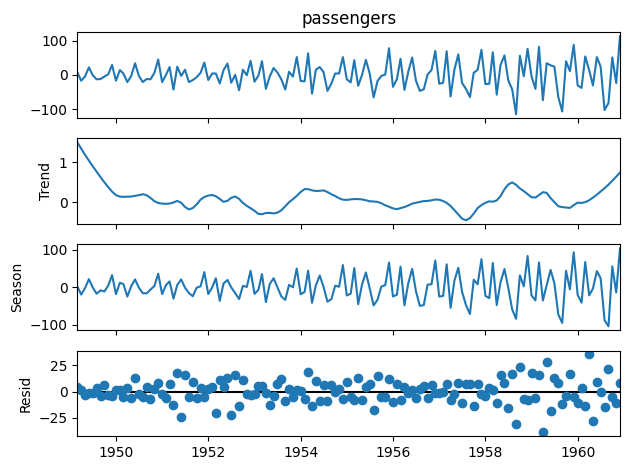

In [16]:
# Decomposition of the differenced series
STL(diff_2['passengers']).fit().plot()
plt.show()

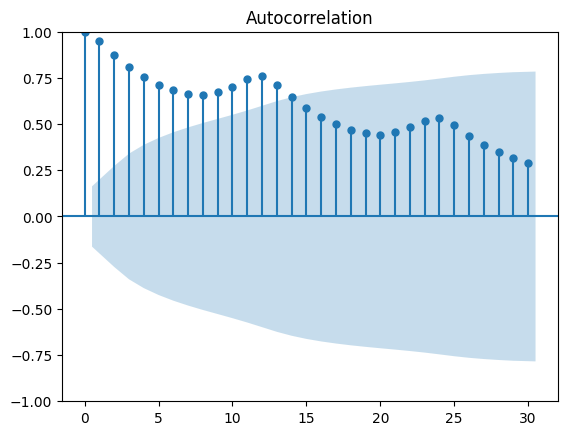

In [17]:
# Plot of ACF to understand the series 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['passengers'], lags=30)
plt.show()

The ACF plot shows an oscillating or wave-like pattern with high correlation (peaks) as seasonal lags. This shows that the data is periodic. The ACF values are also gradually decaying, this is a sign of non-stationarity. So, this timeseries is non-stationary and periodic.

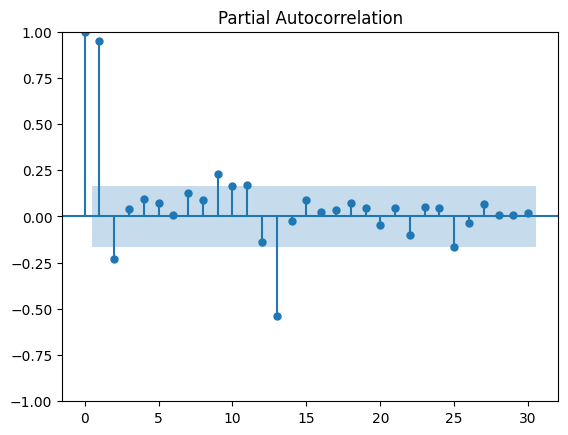

In [18]:
# Plot of PCF to understand the series 
plot_pacf(df['passengers'], lags=30)
plt.show()

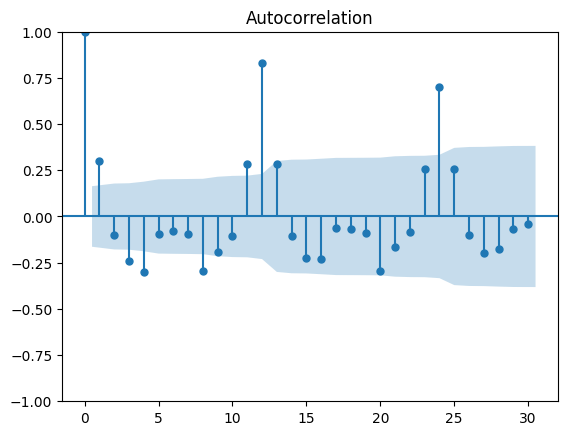

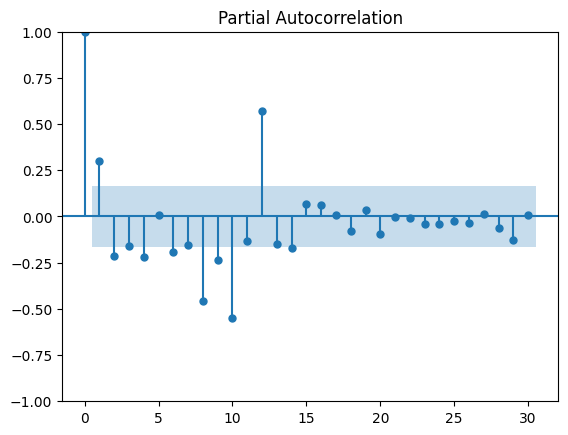

In [19]:
# Plot of ACF to understand the series 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(diff_1, lags=30)
plot_pacf(diff_1, lags=30)
plt.show()

The ACF plot shows an oscillating or wave-like pattern with high correlation (peaks) as seasonal lags.(Though not so apparant as the previous one, but is similar to the previous graph). This shows that the data is periodic. The ACF values are also gradually decaying, look at ACF at 0> 12 > 24,  this is a sign of non-stationarity. So, this timeseries is non-stationary and periodic.

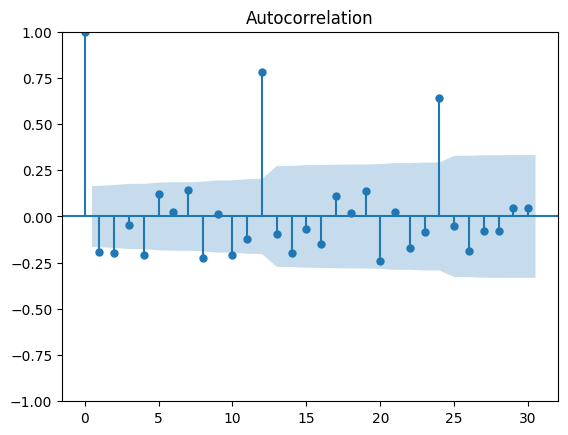

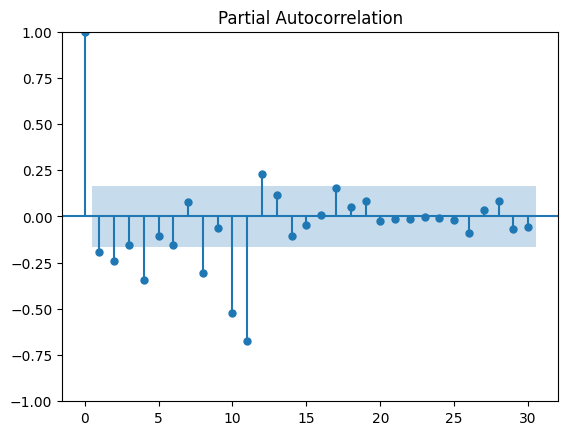

In [20]:
# Plot of ACF to understand the series 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(diff_2, lags=30)
plot_pacf(diff_2, lags=30)
plt.show()

ACF plot of the differenced series. Notice how the coefficients are significant up until lag 2 but immediately after, we see another spike in lag 4. So, there is no clear sign of cutoff at any lag. It shows that this is not a moving average problem. Also, notice the repetitions of the long spikes in 12 and 24. This indicates seasonality of 12 period. We can further clarify the order using our Akaike Information Criterion (AIC). Our range for this will be up to the period.

**Remember**: ACF Cutoff, PACF Decay: Suggests an MA process.

PACF Cutoff, ACF Decay: Suggests an AR process.

Both ACF and PACF Decay: Suggests a mixed ARMA process.

In [21]:
# Specifying a range of parameters to determine the order using AIC
from itertools import product
ps = np.arange(0,13,1) # Order of AR
qs = np.arange(0,13,1) # Order of MA
Ps = [0] # Seasonal order of AR (taught in week 7)
Qs = [0] # Seasonal order of MA (taught in week 7)
d=2 # two-order differencing
D = 0 # Seasonal differencing (taught in week 7)
s= 12 # period
p_q_list = list(product(ps,qs,Ps,Qs))
p_q_list[:5]

[(np.int64(0), np.int64(0), 0, 0),
 (np.int64(0), np.int64(1), 0, 0),
 (np.int64(0), np.int64(2), 0, 0),
 (np.int64(0), np.int64(3), 0, 0),
 (np.int64(0), np.int64(4), 0, 0)]

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

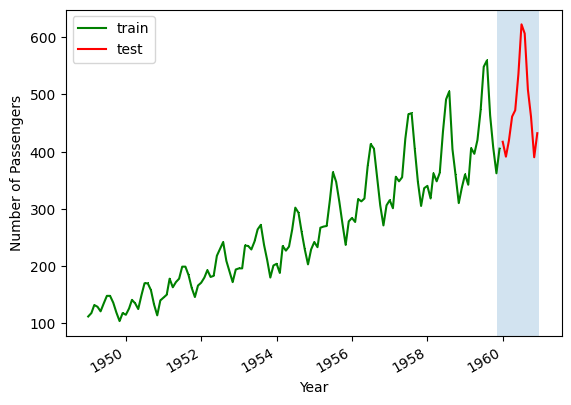

In [ ]:
# Splitting the dataset into train and test set
train = df[['passengers']][:-12]# all the years before the last 12 month
test = df[['passengers']][-12:] # predicting the last 12 months 

fig,ax = plt.subplots()

ax.plot(train,'g-,', label='train')
ax.plot(test,'r-', label='test')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Passengers')
ax.axvspan(-3711.9,-3300.4, alpha=0.2)
fig.autofmt_xdate()
plt.legend()

In [24]:
test.head()

,passengers
month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472



## Exercise 3: Building and evaluating the models


In [25]:
import warnings
warnings.filterwarnings("ignore") #ignoring the warnings
from tqdm import tqdm # to show progress bar
# Function to plot the aic
def aic_values(target):
    
    """This functions accepts a series and returns the aic values"""
    list_of_aic = []

    for order in tqdm(p_q_list):
        try:
            model = SARIMAX(endog=target, order=(order[0], d, order[1]),
            seasonal_order=(order[2], D, order[3], s), simple_differencing=False).fit(disp=False)  #fitting the model for all values of p and q
        except:
            continue #skipping where model fails to fit. Just to showcase error handling, not recommended. Try to find the specific errors and then resolve the issue. 

        list_of_aic.append([order, model.aic]) #model.aic returns the AIC value for the specific model. The list_of_aic is storing all the AIC values for their models (represented by orders)
        
    aic_df = pd.DataFrame(list_of_aic, columns = ['Order(p,q,Ps,QS)','AIC']) #converting list to a dataframe
    aic_df.sort_values(by='AIC', ascending=True, inplace=True)#.reset_index(drop=True) #sorting the AIC values in incremental order, because we want the model with lowest AIC value.
    return aic_df

aic_df = aic_values(train)     # only find the AIC values on train data. If test data used, the problem of data leakage occurs.

100%|██████████| 169/169 [01:52<00:00,  1.50it/s]


In [26]:
aic_df

,"Order(p,q,Ps,QS)",AIC
146,"(11, 3, 0, 0)",1016.842003
147,"(11, 4, 0, 0)",1019.035466
148,"(11, 5, 0, 0)",1020.377994
156,"(12, 0, 0, 0)",1020.953542
144,"(11, 1, 0, 0)",1021.018746
...,...,...
65,"(5, 0, 0, 0)",1281.732157
39,"(3, 0, 0, 0)",1300.282335
26,"(2, 0, 0, 0)",1302.913196
13,"(1, 0, 0, 0)",1308.152194


The number of rows in aic_df =169 and the number of models we started with = 169, so essentially we are not skipping any model.

The lowest AIC value is 1016.89 for p=11, q =3 (from the first row of above dataframe). we used d=2 (when removed non-stationarity)

In [27]:
# Fitting the ARIMA model based on the lowest AIC , order (p,d,q)
arima_model = SARIMAX(endog=train, order=(11, 2,3)).fit() #using original data for train, because differencing (d=2) taken care of during the model fitting.


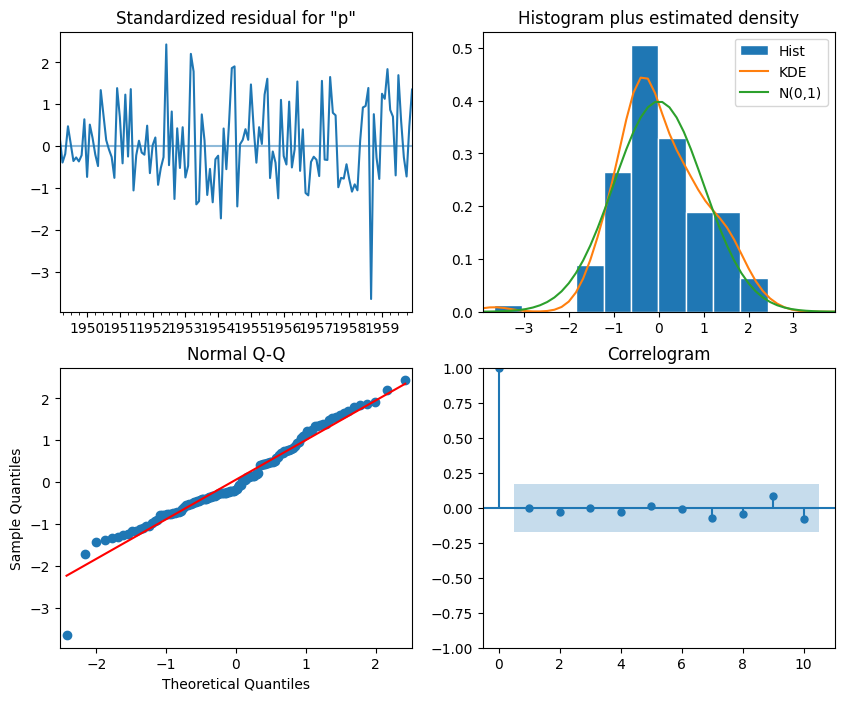

In [28]:
# Plots of the Q-Q plot
arima_model.plot_diagnostics(figsize=(10,8));

## Understanding Q-Q plot (ideal scenarios):
 **top left corner**: The residuals should appear to be randomly scattered around zero, with no obvious trends, patterns, or heteroscedasticity (unequal variance). The residuals should stay within a constant band around zero.
 
 **top right corner**: The histogram and density curve should resemble a normal distribution with a mean of 0. This indicates that the residuals are approximately normally distributed, which is an assumption of many time series models.
 
 **bottom left corner**: The points should fall approximately along a straight diagonal line. This indicates that the residuals are approximately normally distributed.

 **bottom right corner**: All autocorrelation coefficients should be within the blue shaded area (confidence interval), indicating that the residuals are uncorrelated.

In [29]:
# Evaluation using Ljung-Box test

from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(arima_model.resid) #returns test score for first 10 lags.

,lb_stat,lb_pvalue
1,6.551335,0.010481
2,6.677808,0.035476
3,6.954707,0.073356
4,7.748493,0.101238
5,8.392336,0.135898
6,8.678298,0.192495
7,9.492646,0.219193
8,9.730885,0.284425
9,9.741190,0.371841
10,11.532589,0.317555


## Ljung-Box test:  
The Ljung-Box test is a valuable tool for assessing the adequacy of time series models and detecting serial correlation in data. 

**Null Hypothesis (H0)**:The data (typically the residuals of a time series model) are independently distributed (i.e., there is no significant serial correlation up to lag h).
**Alternative Hypothesis (H1)**: The data are not independently distributed (i.e., there is significant serial correlation up to lag h).

Above dataframe points to significant correlation at lags 1 and 2 (p-value ≤ 0.05: Reject the Null Hypothesis.). There is no statistically significant serial correlation at these higher lags. 

**Ideal Scenario**: When you fit a time series model to your data, the goal is to capture all the systematic patterns and dependencies that exist in the data. Once you've done that, what's left over (the residuals) should be random and unpredictable – like white noise. White noise has no autocorrelation; each value is independent of the previous values.
**It strongly indicates that the model is not adequately capturing the autocorrelation present in the data, specifically at the first two lags. The model needs to be improved to address this.** As seen earlier, the original is periodic and non-stationary, throguh the above modelling, we have not considered the seasonal (periodic) component of the time-series, and that's why the results are showing that the modelling in inadequate. 

In [30]:
# Forecasting the test set using both naive_model (using the last values) and arima
len_test = len(test)

arima_pred = arima_model.get_forecast(len_test).predicted_mean.values

naive_pred = train['passengers'][len(train)-12:len(train)].values
test['naive_pred'] = naive_pred
test['arima_pred'] = arima_pred


test

,passengers,naive_pred,arima_pred
month,,,
1960-01-01,417,360,422.331388
1960-02-01,391,342,410.649193
1960-03-01,419,406,461.838574
1960-04-01,461,396,457.788882
1960-05-01,472,420,481.662891
1960-06-01,535,472,531.049169
1960-07-01,622,548,606.144556
1960-08-01,606,559,615.452025
1960-09-01,508,463,525.629516


In [31]:
len(train)

132

In [32]:
# Evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [33]:
arima_mse = mean_absolute_error(test['passengers'],test['arima_pred'])
naive_mse = mean_absolute_error(test['passengers'],test['naive_pred'])

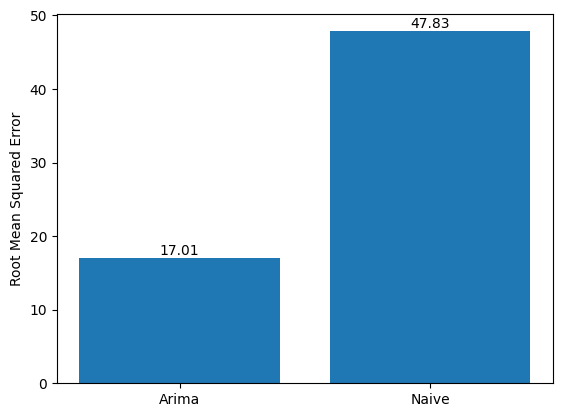

In [34]:
# Plotting the results 

list_mse = [arima_mse,naive_mse]
models = ['Arima', 'Naive']
plt.bar(x=models,height=list_mse)
plt.ylabel('Root Mean Squared Error')

for i, value in enumerate(list_mse):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()